In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform # 운영체제 확인을 위한 모듈
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))
print(font_list[:10]) 

356
['C:\\Windows\\Fonts\\ROCK.TTF', 'C:\\Windows\\Fonts\\ROCKEB.TTF', 'C:\\Windows\\Fonts\\SimsunExtG.ttf', 'C:\\Windows\\Fonts\\GILB____.TTF', 'C:\\Windows\\Fonts\\seguisli.ttf', 'C:\\Windows\\Fonts\\NIAGENG.TTF', 'C:\\Windows\\Fonts\\OCRAEXT.TTF', 'C:\\Windows\\Fonts\\GILI____.TTF', 'C:\\Windows\\Fonts\\ITCBLKAD.TTF', 'C:\\Windows\\Fonts\\ebrima.ttf']


In [6]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_path = r'C:/Windows/Fonts/H2GTRM.TTF' # HY견명조 폰트 경로

# 2. FontProperties 객체 생성
font_prop = fm.FontProperties(fname=font_path).get_name()

# 3. 마이너스 부호 설정 (필요한 경우)
plt.rc('font', family=font_prop)

plt.rc('axes', unicode_minus=False)

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
rate_ocean_final = pd.read_csv('data/rate_ocean_final.csv')

In [7]:
rate_ocean_final.head()

,Date,가자미류,청어,새우,대구,도루묵,기타어류,총어획량,금지여부,염분_50m,...,인산염_50m,규산염_50m,mean_광확산 감쇠 계수,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 최대 파고(m),평균 파주기(sec),Target
0,2011-03-05,62.7,7.6,6.8,4.1,3.2,15.6,37872.0,0,34.087777,...,0.215291,3.534436,0.058370,5.420000,1018.220000,60.000000,4.100000,2.360000,3.680000,4
1,2011-03-12,48.5,1.6,3.4,2.4,37.8,6.3,79934.0,0,34.115109,...,0.211455,3.449480,0.076118,6.785714,1017.542857,53.142857,6.257143,1.957143,2.828571,4
2,2011-03-19,69.8,7.0,5.0,2.5,5.6,10.1,64910.0,0,34.147962,...,0.199250,3.302852,0.070423,6.771429,1017.828571,68.000000,7.457143,2.442857,3.371429,4
3,2011-03-26,75.1,0.5,5.0,2.6,6.4,10.4,53873.0,0,34.173486,...,0.190536,3.145752,0.067224,6.600000,1019.700000,64.000000,6.042857,2.257143,2.971429,4
4,2011-04-02,80.0,0.0,4.9,5.0,0.8,9.3,86681.0,0,34.210325,...,0.158720,2.854243,0.078502,5.171429,1021.400000,64.000000,9.100000,1.357143,2.728571,4


In [8]:
rate_ocean_final.columns

Index(['Date', '가자미류', '청어', '새우', '대구', '도루묵', '기타어류', '총어획량 ', '금지여부',
       '염분_50m', '염분_100m', '염분_200m', '염분_300m', '염분_400m', '염분_500m',
       '해저수온_100m', '해저수온_200m', '해저수온_300m', '해저수온_400m', '해저수온_500m',
       '해수유속(E)_50m', '해수유속(E)_100m', '해수유속(N)_50m', '해수유속(N)_100m',
       'mean_해수면높이', 'mean_혼합층 깊이', '클로로필_50m', '클로로필_100m', '클로로필_200m',
       '클로로필_300m', '클로로필_400m', '클로로필_500m', '질산염_50m', '질산염_100m',
       '질산염_200m', '질산염_300m', '용존 산소_50m', '용존 산소_300m', ' 인산염_50m',
       '규산염_50m', 'mean_광확산 감쇠 계수', '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)',
       '평균 기온(°C)', '평균 최대 파고(m)', '평균 파주기(sec)', 'Target'],
      dtype='object')

In [9]:
target = rate_ocean_final['Target']

In [10]:
numeric_data = rate_ocean_final.drop(columns=['Date', 'Target'])

#Numeric_Data에서 EDA진행 

In [11]:
# 깆
numeric_data.head()

,가자미류,청어,새우,대구,도루묵,기타어류,총어획량,금지여부,염분_50m,염분_100m,...,용존 산소_300m,인산염_50m,규산염_50m,mean_광확산 감쇠 계수,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 최대 파고(m),평균 파주기(sec)
0,62.7,7.6,6.8,4.1,3.2,15.6,37872.0,0,34.087777,34.056530,...,223.421580,0.215291,3.534436,0.058370,5.420000,1018.220000,60.000000,4.100000,2.360000,3.680000
1,48.5,1.6,3.4,2.4,37.8,6.3,79934.0,0,34.115109,34.077639,...,223.181014,0.211455,3.449480,0.076118,6.785714,1017.542857,53.142857,6.257143,1.957143,2.828571
2,69.8,7.0,5.0,2.5,5.6,10.1,64910.0,0,34.147962,34.108084,...,222.804057,0.199250,3.302852,0.070423,6.771429,1017.828571,68.000000,7.457143,2.442857,3.371429
3,75.1,0.5,5.0,2.6,6.4,10.4,53873.0,0,34.173486,34.129434,...,222.491197,0.190536,3.145752,0.067224,6.600000,1019.700000,64.000000,6.042857,2.257143,2.971429
4,80.0,0.0,4.9,5.0,0.8,9.3,86681.0,0,34.210325,34.145569,...,222.124141,0.158720,2.854243,0.078502,5.171429,1021.400000,64.000000,9.100000,1.357143,2.728571


In [12]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   가자미류            727 non-null    float64
 1   청어              727 non-null    float64
 2   새우              727 non-null    float64
 3   대구              727 non-null    float64
 4   도루묵             727 non-null    float64
 5   기타어류            727 non-null    float64
 6   총어획량            727 non-null    float64
 7   금지여부            727 non-null    int64  
 8   염분_50m          727 non-null    float64
 9   염분_100m         727 non-null    float64
 10  염분_200m         727 non-null    float64
 11  염분_300m         727 non-null    float64
 12  염분_400m         727 non-null    float64
 13  염분_500m         727 non-null    float64
 14  해저수온_100m       727 non-null    float64
 15  해저수온_200m       727 non-null    float64
 16  해저수온_300m       727 non-null    float64
 17  해저수온_400m       727 non-null    flo

In [13]:
numeric_data.describe()

,가자미류,청어,새우,대구,도루묵,기타어류,총어획량,금지여부,염분_50m,염분_100m,...,용존 산소_300m,인산염_50m,규산염_50m,mean_광확산 감쇠 계수,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 최대 파고(m),평균 파주기(sec)
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,...,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,37.501788,19.489450,7.145309,6.402036,17.792902,6.028900,141897.041265,0.056396,33.673882,34.202459,...,215.895256,0.091749,3.499873,0.061165,5.761238,1015.234435,71.778935,15.302103,2.106253,5.724241
std,20.825885,23.611387,8.433755,8.503908,19.528211,7.167725,94266.277760,0.230844,0.532665,0.117201,...,4.387906,0.076190,0.692979,0.017482,1.477643,6.456370,13.605996,7.124196,0.856407,1.152344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.120209,33.837401,...,205.845643,0.008132,1.840164,0.039323,2.314286,999.614286,44.285714,-0.900000,0.442857,2.428571
25%,20.150000,0.700000,1.700000,1.100000,1.100000,2.200000,84812.000000,0.000000,33.264750,34.129678,...,212.835189,0.034827,3.086328,0.048758,4.685714,1009.700000,60.357143,9.278571,1.450000,4.900000
50%,38.800000,8.900000,4.200000,3.600000,9.900000,4.000000,125867.000000,0.000000,33.839844,34.215487,...,216.311769,0.053323,3.479268,0.055734,5.585714,1015.671429,70.285714,15.742857,2.014286,5.685714
75%,52.850000,31.350000,9.300000,8.400000,29.750000,6.900000,182740.000000,0.000000,34.125100,34.281711,...,218.999154,0.151999,3.923016,0.068352,6.707143,1020.314286,84.000000,21.335714,2.671429,6.571429
max,96.000000,95.300000,53.700000,57.400000,87.700000,66.630000,635018.000000,1.000000,34.539742,34.449643,...,224.215109,0.273193,5.650450,0.134617,10.171429,1029.514286,99.000000,30.342857,5.657143,8.757143


In [14]:
#결측치 확인 - 이상없음
numeric_data.isnull().sum()

가자미류              0
청어                0
새우                0
대구                0
도루묵               0
기타어류              0
총어획량              0
금지여부              0
염분_50m            0
염분_100m           0
염분_200m           0
염분_300m           0
염분_400m           0
염분_500m           0
해저수온_100m         0
해저수온_200m         0
해저수온_300m         0
해저수온_400m         0
해저수온_500m         0
해수유속(E)_50m       0
해수유속(E)_100m      0
해수유속(N)_50m       0
해수유속(N)_100m      0
mean_해수면높이        0
mean_혼합층 깊이       0
클로로필_50m          0
클로로필_100m         0
클로로필_200m         0
클로로필_300m         0
클로로필_400m         0
클로로필_500m         0
질산염_50m           0
질산염_100m          0
질산염_200m          0
질산염_300m          0
용존 산소_50m         0
용존 산소_300m        0
 인산염_50m          0
규산염_50m           0
mean_광확산 감쇠 계수    0
평균 풍속(m/s)        0
평균기압(hPa)         0
평균 상대습도(%)        0
평균 기온(°C)         0
평균 최대 파고(m)       0
평균 파주기(sec)       0
dtype: int64

In [15]:
print(numeric_data.columns)

Index(['가자미류', '청어', '새우', '대구', '도루묵', '기타어류', '총어획량 ', '금지여부', '염분_50m',
       '염분_100m', '염분_200m', '염분_300m', '염분_400m', '염분_500m', '해저수온_100m',
       '해저수온_200m', '해저수온_300m', '해저수온_400m', '해저수온_500m', '해수유속(E)_50m',
       '해수유속(E)_100m', '해수유속(N)_50m', '해수유속(N)_100m', 'mean_해수면높이',
       'mean_혼합층 깊이', '클로로필_50m', '클로로필_100m', '클로로필_200m', '클로로필_300m',
       '클로로필_400m', '클로로필_500m', '질산염_50m', '질산염_100m', '질산염_200m', '질산염_300m',
       '용존 산소_50m', '용존 산소_300m', ' 인산염_50m', '규산염_50m', 'mean_광확산 감쇠 계수',
       '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)', '평균 최대 파고(m)',
       '평균 파주기(sec)'],
      dtype='object')


In [16]:
col_species = ['가자미류','청어','새우','대구','도루묵', '기타어류']
col_totalamount = ['총어획량 ']
col_salt = ['염분_50m','염분_100m', '염분_200m', '염분_300m', '염분_400m', '염분_500m']
col_temp = ['해저수온_100m','해저수온_200m', '해저수온_300m', '해저수온_400m', '해저수온_500m']
col_flowrate = ['해수유속(E)_50m','해수유속(E)_100m','해수유속(N)_50m','해수유속(N)_100m']
col_height = ['mean_해수면높이']
col_depth = ['mean_혼합층 깊이']
col_clolo = ['클로로필_50m', '클로로필_100m', '클로로필_200m', '클로로필_300m','클로로필_400m', '클로로필_500m']
col_n2 = ['질산염_50m', '질산염_100m', '질산염_200m', '질산염_300m'] 
col_che_50m = ['클로로필_50m','질산염_50m',' 인산염_50m', '규산염_50m']
col_o2 = ['용존 산소_50m', '용존 산소_300m'] 
col_climate = ['평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)', '평균 최대 파고(m)']

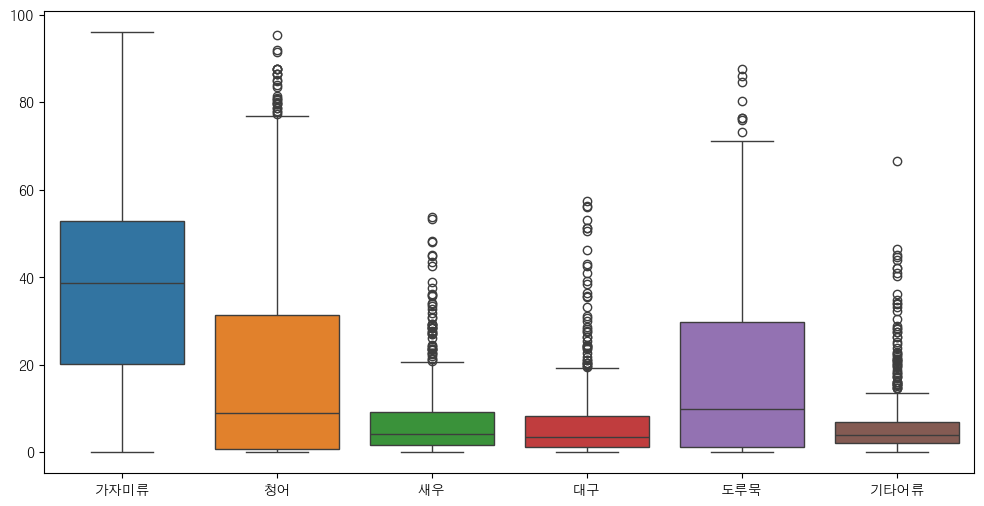

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(numeric_data[col_species])
plt.show()
# 가자미류를 제외한 나머지 어종의 이상치데이터로, 어종마다 특별히 많이 잡히는 기간이 있음을 시각적으로 파악

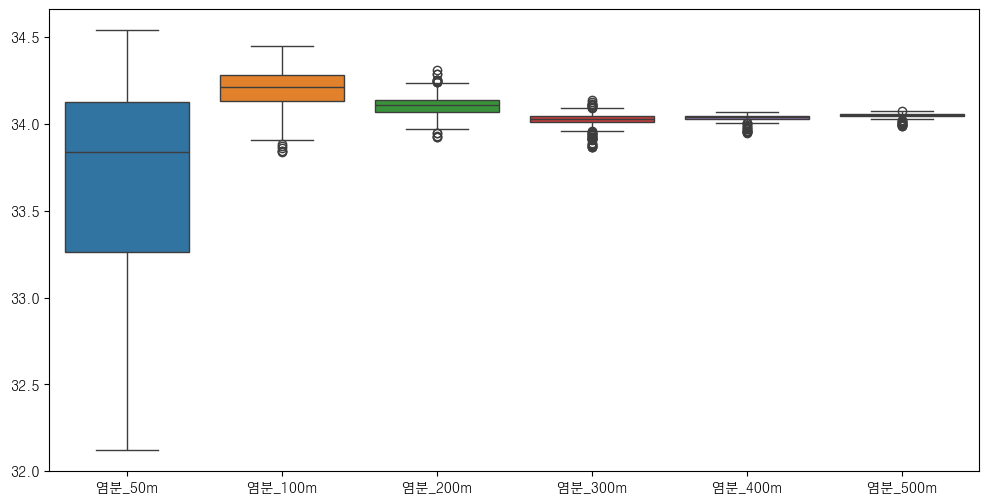

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(numeric_data[col_salt])
plt.show()
# 염분농도가 수심 100m 까지 가변적, 200m 부터는 일정 값으로 수렴함을 파악

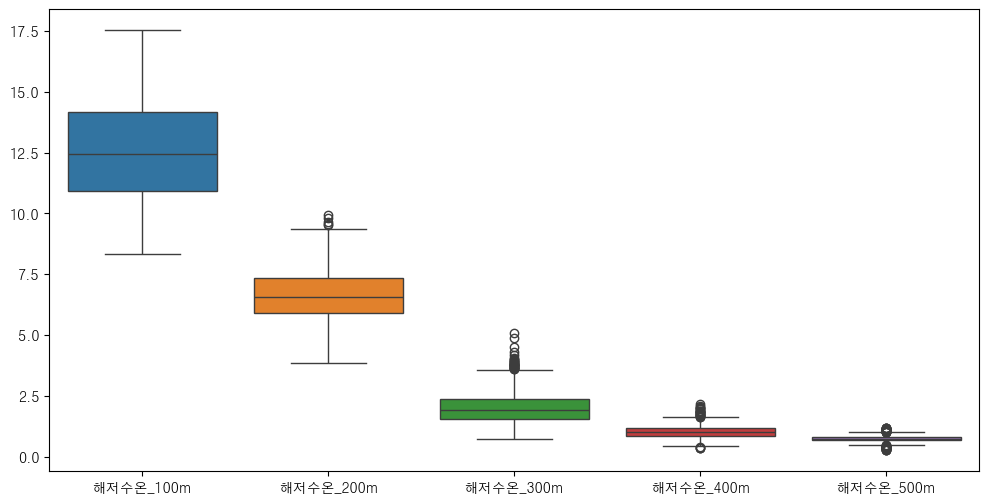

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(numeric_data[col_temp])
plt.show()
# 해저수온은 300m 까지 급격히 낮아지며, 그 이후부터는 점진적 감소 및 수렴예상

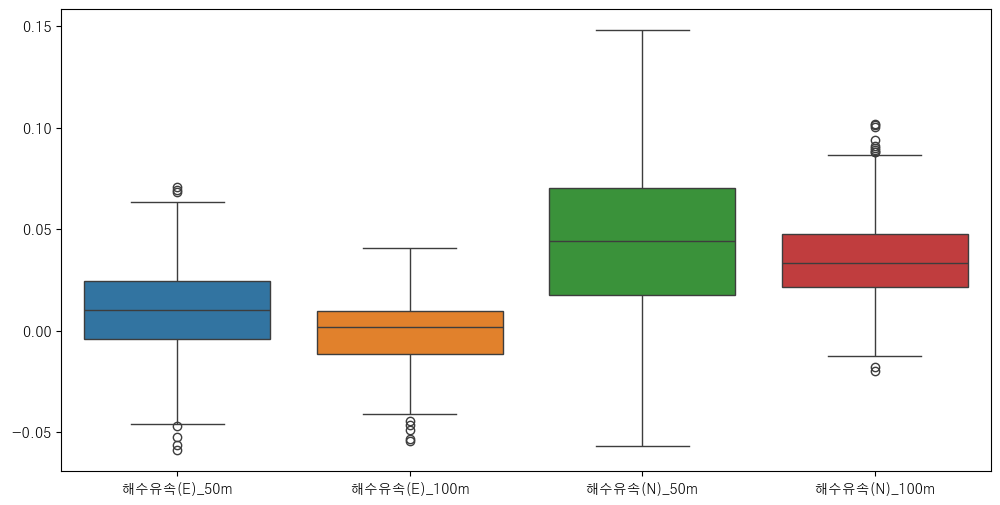

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(numeric_data[col_flowrate])
plt.show()
# 북쪽 유속이 대체적으로 동쪽유속보다 빠르며, 깊이와 유속은 반비례관계

In [3]:
plt.figure(figsize=(12, 6))
sns.boxplot(numeric_data[col_clolo])
plt.show()
# 수심이 깊어짐에 따라 클로로필 농도는 감소하는 경향을 보임

NameError: name 'sns' is not defined

<Figure size 1200x600 with 0 Axes>

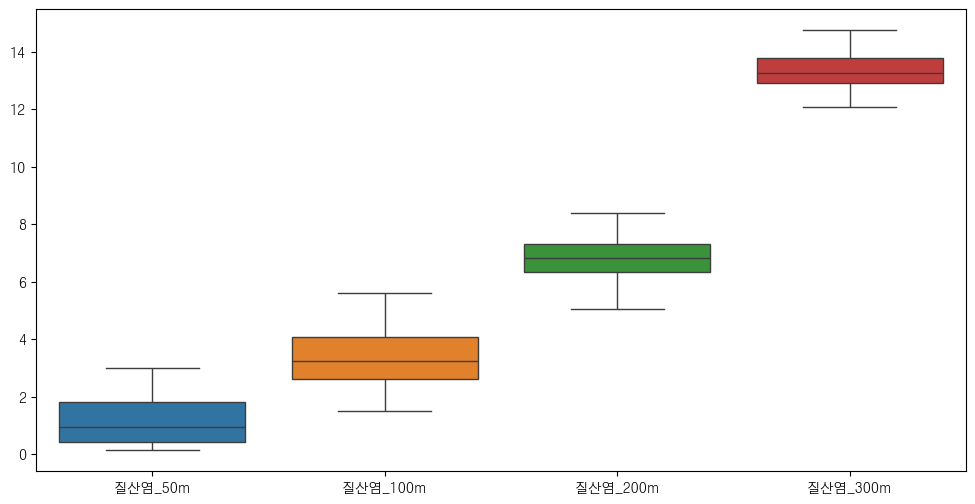

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(numeric_data[col_n2])
plt.show()
# 질산염 농도는 수심이 깊어질수록 증가하는 경향을 보임

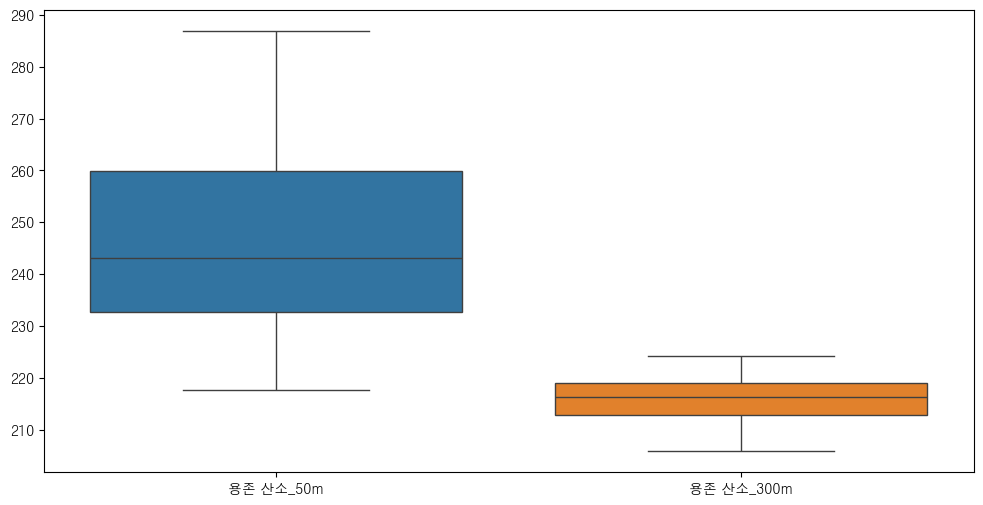

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(numeric_data[col_o2])
plt.show()

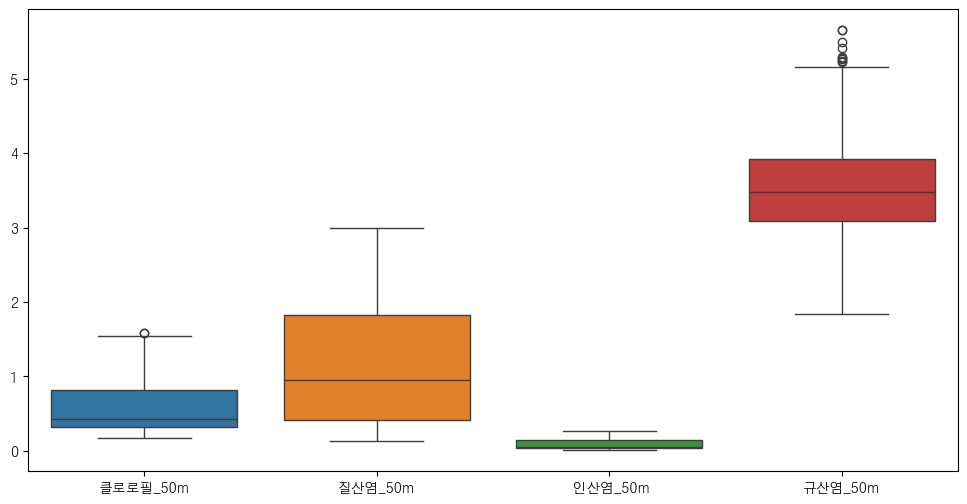

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(numeric_data[col_che_50m])
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression

for feature in numeric_data.columns:
    X = numeric_data[feature]
    y = rate_ocean_final['Target']
    
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[feature], y=y, label='Actual')
    plt.plot(X[feature], y_pred, color='red', label='Linear Fit')
    plt.title(f'{feature} vs {target}\nR²: {model.score(X, y):.3f}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [147]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras.utils import to_categorical
from xgboost import XGBClassifier
from sklearn.model_selection import  GridSearchCV
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
ocean_num = pd.read_csv('data/Num_ocean.csv')
ocean_rate = pd.read_csv('data/rate_ocean_final.csv')

In [253]:
ocean_rate = ocean_rate.drop(columns=['Target'])

In [54]:
ocean_data.columns

Index(['가자미류', '청어', '새우', '대구', '도루묵', '기타어류', '총어획량 ', '금지여부', '염분_50m',
       '염분_100m', '염분_200m', '염분_300m', '염분_400m', '염분_500m', '해저수온_100m',
       '해저수온_200m', '해저수온_300m', '해저수온_400m', '해저수온_500m', '해수유속(E)_50m',
       '해수유속(E)_100m', '해수유속(N)_50m', '해수유속(N)_100m', 'mean_해수면높이',
       'mean_혼합층 깊이', '클로로필_50m', '클로로필_100m', '클로로필_200m', '클로로필_300m',
       '클로로필_400m', '클로로필_500m', '질산염_50m', '질산염_100m', '질산염_200m', '질산염_300m',
       '용존 산소_50m', '용존 산소_300m', ' 인산염_50m', '규산염_50m', 'mean_광확산 감쇠 계수',
       '평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)', '평균 최대 파고(m)',
       '평균 파주기(sec)', 'Target'],
      dtype='object')

In [55]:
col_species = ['가자미류','청어','새우','대구','도루묵', '기타어류']
col_totalamount = ['총어획량 ']
col_chemical = ['염분_50m','염분_100m', '해저수온_100m','해저수온_200m','해수유속(E)_50m','해수유속(E)_100m', '해수유속(N)_50m', '해수유속(N)_100m', 'mean_해수면높이','클로로필_50m', '클로로필_100m','질산염_50m', '질산염_100m','용존 산소_50m',' 인산염_50m', '규산염_50m','평균 풍속(m/s)', '평균기압(hPa)', '평균 상대습도(%)', '평균 기온(°C)', '평균 최대 파고(m)','평균 파주기(sec)', 'Target']

In [56]:
for species in col_species:
    ocean_data[species] = (ocean_data[species] * ocean_data['총어획량 ']) / 100

In [79]:
ocean_data.head()

,가자미류,청어,새우,대구,도루묵,기타어류,총어획량,금지여부,염분_50m,염분_100m,...,인산염_50m,규산염_50m,mean_광확산 감쇠 계수,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 최대 파고(m),평균 파주기(sec),Target
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-05,23745.744,2878.272,2575.296,1552.752,1211.904,5908.032,37872.0,0,34.087777,34.056530,...,0.215291,3.534436,0.058370,5.420000,1018.220000,60.000000,4.100000,2.360000,3.680000,4
2011-03-12,38767.990,1278.944,2717.756,1918.416,30215.052,5035.842,79934.0,0,34.115109,34.077639,...,0.211455,3.449480,0.076118,6.785714,1017.542857,53.142857,6.257143,1.957143,2.828571,4
2011-03-19,45307.180,4543.700,3245.500,1622.750,3634.960,6555.910,64910.0,0,34.147962,34.108084,...,0.199250,3.302852,0.070423,6.771429,1017.828571,68.000000,7.457143,2.442857,3.371429,4
2011-03-26,40458.623,269.365,2693.650,1400.698,3447.872,5602.792,53873.0,0,34.173486,34.129434,...,0.190536,3.145752,0.067224,6.600000,1019.700000,64.000000,6.042857,2.257143,2.971429,4
2011-04-02,69344.800,0.000,4247.369,4334.050,693.448,8061.333,86681.0,0,34.210325,34.145569,...,0.158720,2.854243,0.078502,5.171429,1021.400000,64.000000,9.100000,1.357143,2.728571,4


In [58]:
col = col_species + col_chemical + col_totalamount

In [59]:
col

['가자미류',
 '청어',
 '새우',
 '대구',
 '도루묵',
 '기타어류',
 '염분_50m',
 '염분_100m',
 '해저수온_100m',
 '해저수온_200m',
 '해수유속(E)_50m',
 '해수유속(E)_100m',
 '해수유속(N)_50m',
 '해수유속(N)_100m',
 'mean_해수면높이',
 '클로로필_50m',
 '클로로필_100m',
 '질산염_50m',
 '질산염_100m',
 '용존 산소_50m',
 ' 인산염_50m',
 '규산염_50m',
 '평균 풍속(m/s)',
 '평균기압(hPa)',
 '평균 상대습도(%)',
 '평균 기온(°C)',
 '평균 최대 파고(m)',
 '평균 파주기(sec)',
 'Target',
 '총어획량 ']

In [ ]:
ocean_data_clean = ocean_data[col]

In [ ]:
ocean_rate

In [293]:
ocean_num.set_index('Date',inplace=True)

In [160]:
def create_sequence(data, window_size,target_name):
    y_data= data[target_name].values
    times = data.index
    data = data.values
    X, y = [], []
    time_list = []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(y_data[i + window_size])
        time_list.append(times[i + window_size])
    X, y = np.array(X), np.array(y)
    return X,y,time_list

In [294]:
window_size = 56
X,y,time_list = create_sequence(ocean_num, window_size,['가자미류','청어','새우','대구','도루묵','기타어류'])

In [295]:
split_index = int(len(X) * 0.8)
X_train_raw, y_train_raw = X[:split_index], y[:split_index]
X_test_raw, y_test_raw = X[split_index:], y[split_index:]
time_list_train,time_list_test=time_list[:split_index],time_list[split_index:]
feauture_num = X_train_raw.shape[2]

In [291]:
scaler= MinMaxScaler()
y_scaler= MinMaxScaler()

In [296]:
X_train_scaled = scaler.fit_transform(X_train_raw.reshape(-1, feauture_num)).reshape(X_train_raw.shape)
y_train =y_scaler.fit_transform(y_train_raw.reshape(-1, y_train_raw.shape[1]))


X_test_scaled = scaler.transform(X_test_raw.reshape(-1, feauture_num)).reshape(X_test_raw.shape)
y_test = y_scaler.transform(y_test_raw.reshape(-1, y_train_raw.shape[1]))

X_train=X_train_scaled
X_train
X_test=X_test_scaled
X_test

array([[[3.85411210e-01, 1.45673999e-01, 2.78257927e-01, ...,
         1.64383562e-01, 1.71171171e-01, 3.36343115e-01],
        [4.82120059e-01, 1.48668299e-01, 1.71369813e-01, ...,
         1.28767123e-01, 1.35135135e-01, 3.27313770e-01],
        [6.39560559e-01, 9.26311745e-02, 1.76706409e-01, ...,
         2.13698630e-01, 2.25225225e-01, 5.46275395e-01],
        ...,
        [3.96090667e-01, 0.00000000e+00, 1.51468215e-01, ...,
         2.21917808e-01, 2.34234234e-01, 4.78555305e-01],
        [2.32499389e-01, 1.73894610e-04, 1.57338470e-01, ...,
         2.21917808e-01, 2.34234234e-01, 3.74717833e-01],
        [3.48409529e-01, 8.44630963e-05, 6.41953454e-02, ...,
         3.28767123e-01, 3.33333333e-01, 5.14672686e-01]],

       [[4.82120059e-01, 1.48668299e-01, 1.71369813e-01, ...,
         1.28767123e-01, 1.35135135e-01, 3.27313770e-01],
        [6.39560559e-01, 9.26311745e-02, 1.76706409e-01, ...,
         2.13698630e-01, 2.25225225e-01, 5.46275395e-01],
        [5.98717068e-01, 

In [224]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,Flatten,Dropout,SimpleRNN,LSTM, MaxPooling1D,AveragePooling1D,GlobalAvgPool1D
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.01,
    patience=5,
    verbose=1,
    mode='auto' )

In [124]:
X_train_reshape = X_train.reshape(-1, X_train.shape[1]*X_train.shape[2])
X_test_reshape = X_train.reshape(-1, X_train.shape[1]*X_train.shape[2])

In [226]:
Fnn = Sequential()
Fnn.add(Dense(128,activation='relu',input_dim=(X_train_reshape.shape[1])))
Fnn.add(Dense(64,activation='relu'))
Fnn.add(Dense(32,activation='relu'))
Fnn.add(Dense(y_train.shape[1],activation='softmax'))
Fnn.compile(optimizer='adam', loss='mse')
Fnn.summary()

c:\Users\rnrgh\OneDrive\바탕 화면\Second_Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 128)            │        72,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,854 (323.65 KB)

 Trainable params: 82,854 (323.65 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
Fnn_history = Fnn.fit(X_train_reshape,y_train,epochs=100,validation_split=0.1,callbacks=[early_stopping])

Epoch 1/100


c:\Users\rnrgh\OneDrive\바탕 화면\Second_Project\.venv\Lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.8973 - val_loss: 2.1230
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9447 - val_loss: 2.1230
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0792 - val_loss: 2.1230
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0586 - val_loss: 2.1230
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9358 - val_loss: 2.1230
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8538 - val_loss: 2.1230
Epoch 6: early stopping


In [143]:
y_pred = Fnn.predict(X_test_reshape)
y_pred = y_scaler.inverse_transform(y_pred)
y_test_iverse = y_scaler.inverse_transform(y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


c:\Users\rnrgh\OneDrive\바탕 화면\Second_Project\.venv\Lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [230]:
y_pred

array([[-7.84869552e-01, -2.02050760e-01, -7.26066828e-01,
        -7.62296200e-01, -4.79341924e-01, -8.09611142e-01],
       [-9.46557939e-01, -2.98753887e-01, -6.97671711e-01,
        -6.29332840e-01, -4.79359269e-01, -6.94978833e-01],
       [-1.29266500e+00, -3.66064310e-01, -9.35517132e-01,
        -6.91332221e-01, -6.83531523e-01, -8.93425822e-01],
       [-1.32373798e+00, -4.09217417e-01, -9.95557964e-01,
        -8.15732777e-01, -8.09128642e-01, -9.53810453e-01],
       [-1.02729905e+00, -3.83542717e-01, -8.14606011e-01,
        -7.36147642e-01, -6.94299698e-01, -7.50439882e-01],
       [-4.36883777e-01, -9.70811024e-02, -3.45507503e-01,
        -4.99334693e-01, -1.37752160e-01, -4.68227655e-01],
       [ 6.92123100e-02, -6.29238039e-02,  5.82642034e-02,
        -8.44823122e-02,  2.58225262e-01, -3.22315514e-01],
       [ 2.18346506e-01, -1.01214297e-01,  1.11766428e-01,
         9.14162248e-02,  3.51835668e-01, -2.84862101e-01],
       [ 2.97326267e-01, -8.31668898e-02,  1.743

In [227]:
print('-----------FNN-----------')
print("정확도:",accuracy_score(y_test_iverse,y_pred))
print("혼동행렬:\n",confusion_matrix(y_test_iverse,y_pred))
print('분류보고서\n',classification_report(y_test_iverse,y_pred))

-----------FNN-----------


ValueError: Found input variables with inconsistent numbers of samples: [143, 145]

In [129]:
y_test_raw.shape

(143, 1)

In [130]:
y.pred.shape

AttributeError: 'numpy.ndarray' object has no attribute 'pred'

In [279]:
y_train.shape

(578, 6)

In [297]:
Rnn = Sequential()
Rnn.add(SimpleRNN(128, activation='tanh', input_shape=(X_train.shape[1],X_train.shape[2])))
Rnn.add(Dense(units=16, activation='relu'))
Rnn.add(Dense(y_train.shape[1]))
Rnn.compile(optimizer='adam', loss='mse')
Rnn.summary()

c:\Users\rnrgh\OneDrive\바탕 화면\Second_Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_25 (SimpleRNN)       │ (None, 128)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,022 (109.46 KB)

 Trainable params: 28,022 (109.46 KB)

 Non-trainable params: 0 (0.00 B)

In [278]:
X_train.shape

(578, 4, 46)

In [298]:
Rnn_history = Rnn.fit(X_train,y_train,epochs=100,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.1319 - val_loss: 0.0366
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0191 - val_loss: 0.0322
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0149 - val_loss: 0.0253
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0141 - val_loss: 0.0257
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0121 - val_loss: 0.0215
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0118 - val_loss: 0.0222
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0111 - val_loss: 0.0207
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0101 - val_loss: 0.0205
Epoch 8: early stopping


In [220]:
y_test_raw

array([[5.92320e+04, 1.51000e+02, 4.24200e+03, 5.90800e+03, 6.82000e+02,
        5.52900e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [6.98890e+04, 0.00000e+00, 8.64800e+03, 1.76980e+04, 5.00000e+01,
        4.27400e+03],
       [7.96210e+04, 1.05000e+02, 9.78200e+03, 8.62500e+03, 3.16000e+02,
        6.73100e+03],
       [1.02069e+05, 0.00000e+00, 1.16370e+04, 7.71100e+03, 8.13200e+03,
        1.06560e+04],
       [5.99130e+04, 1.05000e+02, 1.20880e+04, 2.62800e+03, 1.19560e+04,
        4.46990e+04],
       [8.97820e+04, 5.10000e+01, 4.93200e+03, 1.51700e+03, 1.44160e+04,
        1.57560e+04],
       [7.99870e+04, 4.50000e+01, 1.12990e+04, 2.8

In [198]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

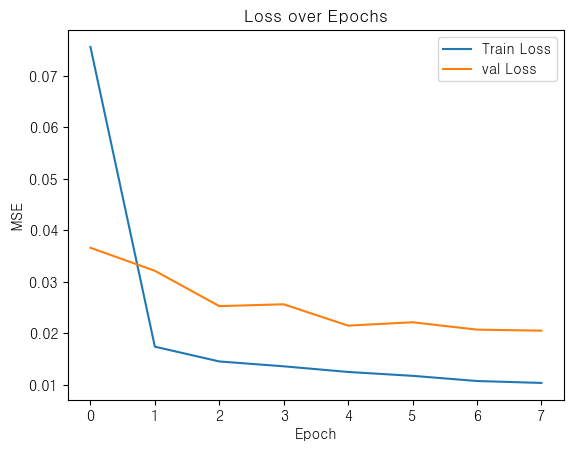

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
MSE: 1409937837.2381194
MAE: 26115.254934420405


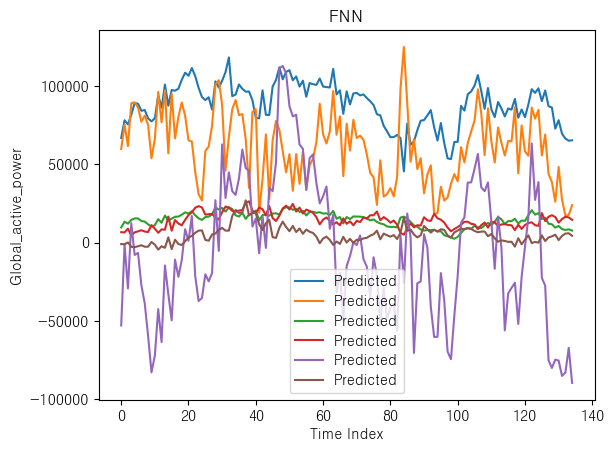

In [299]:
plt.plot(Rnn_history.history['loss'], label='Train Loss')
plt.plot(Rnn_history.history['val_loss'], label='val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

#  11. 예측 및 복원
y_pred = Rnn.predict(X_test)
y_pred_inverse = y_scaler.inverse_transform(y_pred)

mse= mean_squared_error(y_test_raw, y_pred_inverse )
mae= mean_absolute_error(y_test_raw, y_pred_inverse )
print('MSE:', mse)
print('MAE:', mae)

# #  12. 실제값 vs 예측값 시각화
# plt.figure(figsize=(12, 10))
# plt.plot(rnn_y_test_inv[], label='Actual')# 
plt.plot(y_pred_inverse, label='Predicted')# 
plt.legend()# 
plt.title('FNN')# 
plt.xlabel('Time Index')# 
plt.ylabel('Global_active_power')# 
plt.show()

가자미류Mse: 1853016374.6969533 Mae: 36038.548350694444
청어Mse: 3267965236.986454 Mae: 51991.54483506944
새우Mse: 155315808.30095568 Mae: 9059.713679108796
대구Mse: 1117919297.5918052 Mae: 16890.104376446758
도루묵Mse: 1957551851.8611128 Mae: 35913.434191159846
기타어류Mse: 107858453.99143995 Mae: 6798.184174043161


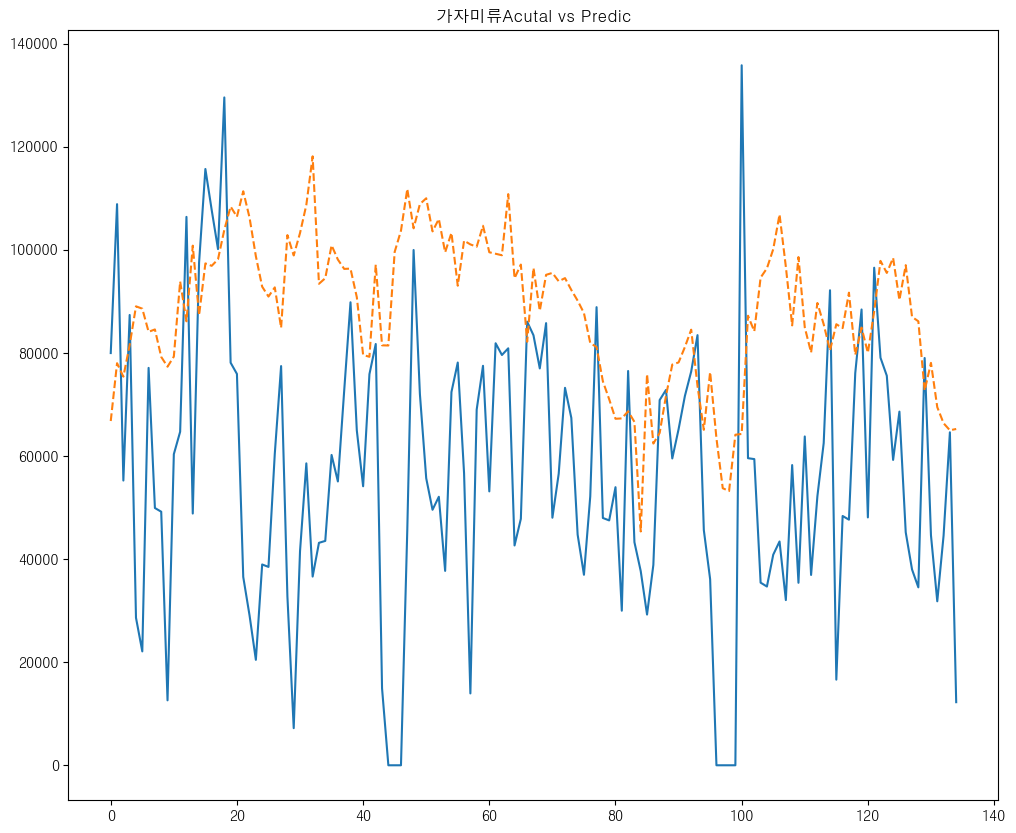

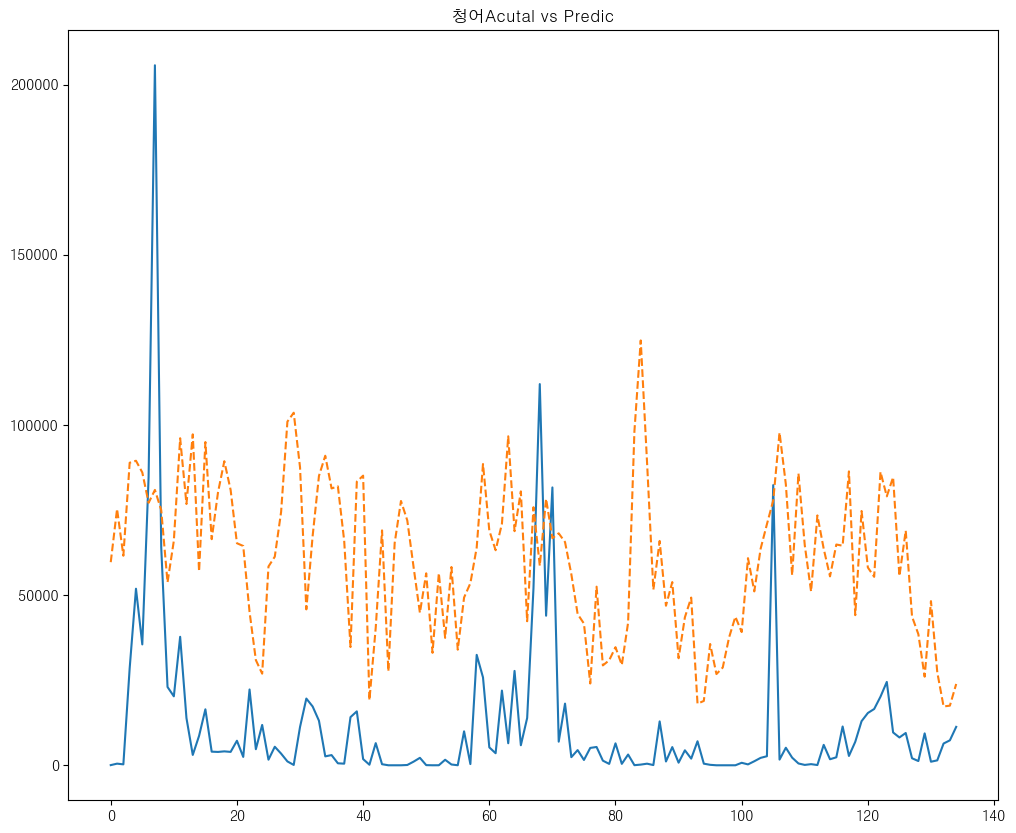

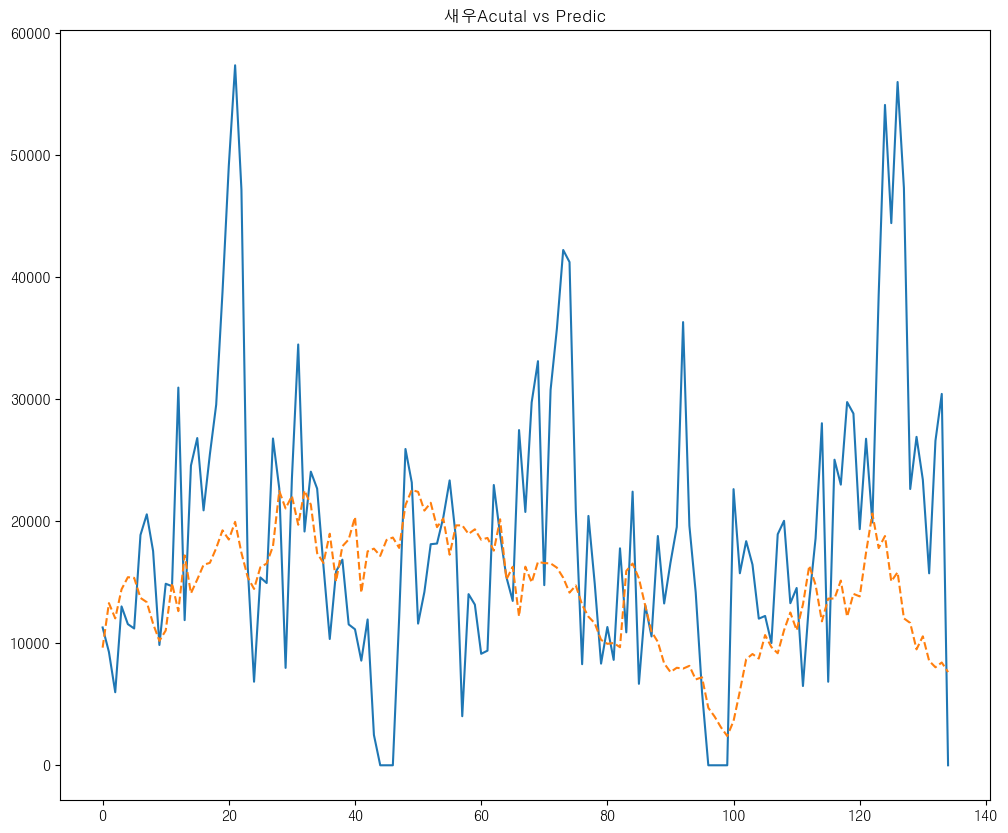

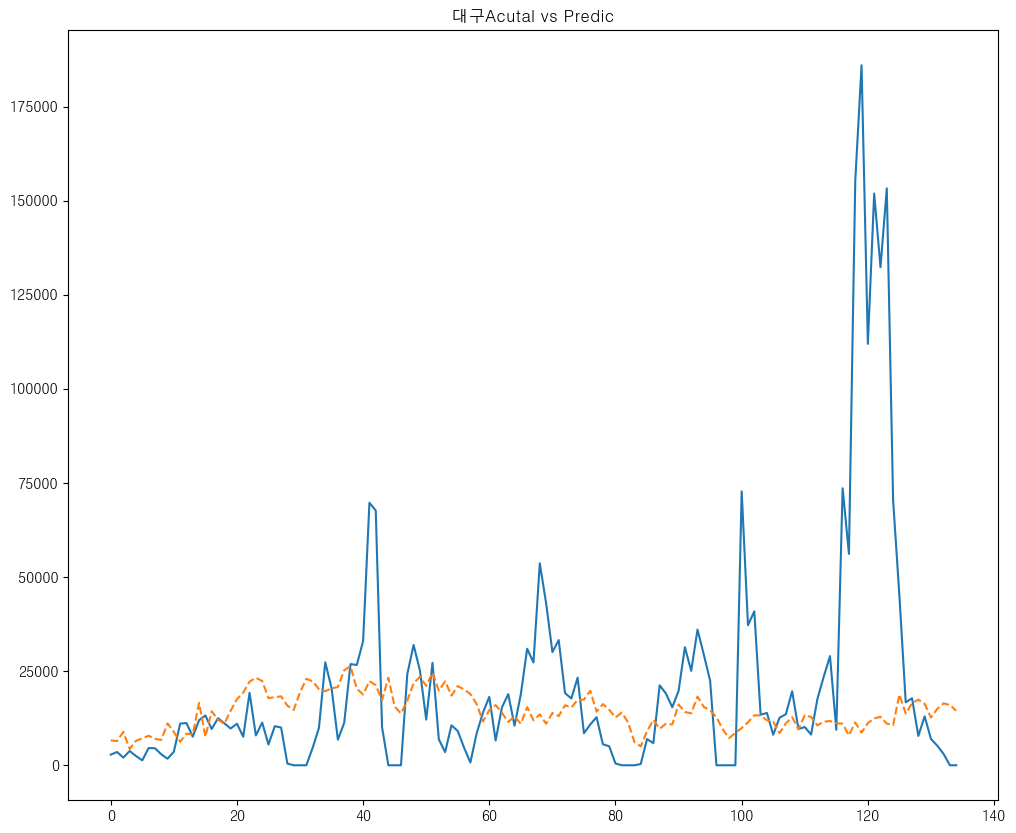

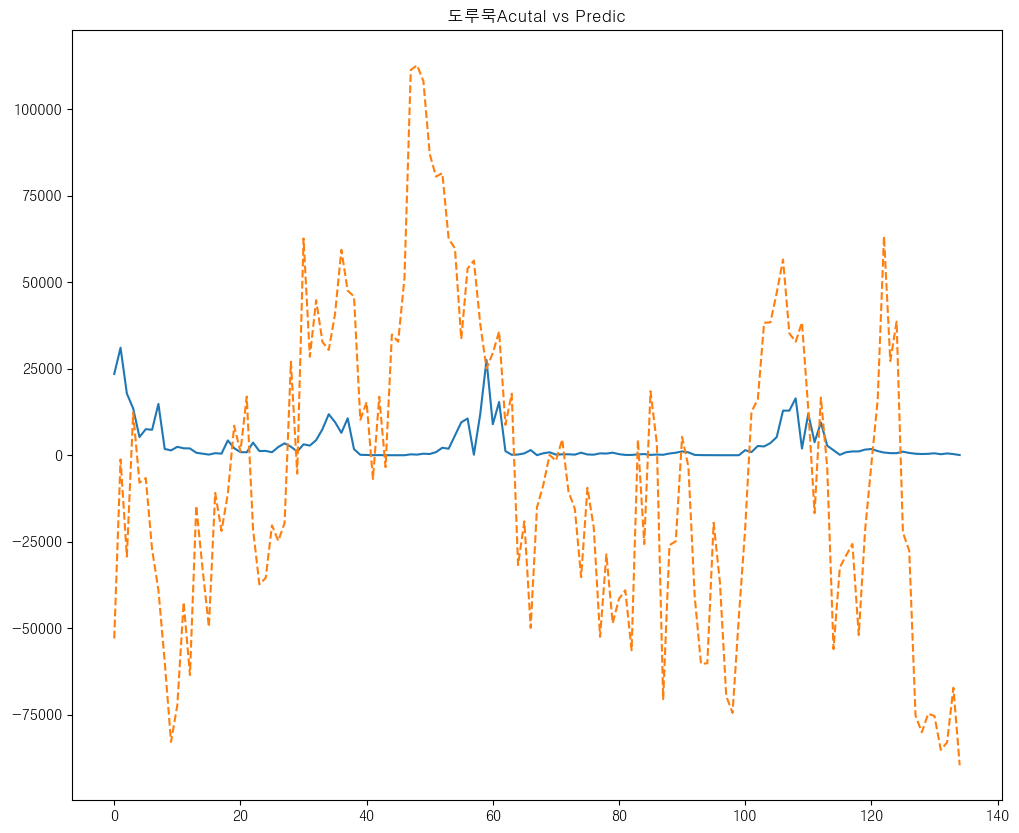

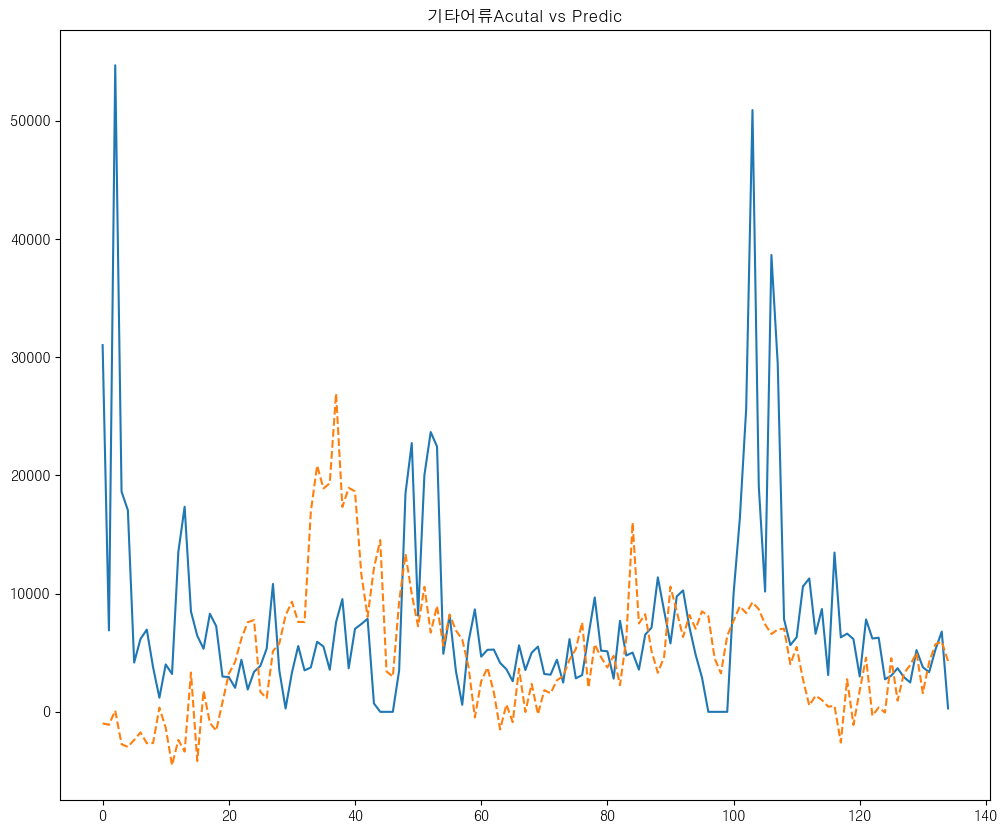

In [302]:
num_target = y_test_raw.shape[1]
target_name=['가자미류','청어','새우','대구','도루묵','기타어류']
for i in range(num_target):
    mse_target = mean_squared_error(y_test_raw[:,i], y_pred_inverse[:,i])
    mae_target = mean_absolute_error(y_test_raw[:,i], y_pred_inverse[:,i])
    target = target_name[i]
    print(f'{target}Mse:',mse_target,f'Mae:',mae_target)
    plt.figure(figsize=(12,10))
    plt.plot(y_test_raw[:,i],label='Actuarl')
    plt.plot(y_pred_inverse[:,i],label='Predicted',linestyle='--')
    plt.title(f'{target}Acutal vs Predic')


In [243]:
ocean_num_target = ['가자미류', '청어', '새우', '대구', '도루묵', '기타어류', '총어획량 ']

In [250]:
ocean_num[ocean_num_target].describe()

,가자미류,청어,새우,대구,도루묵,기타어류,총어획량
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,48245.031637,38852.841816,9182.088033,8969.471802,28678.420908,7969.220083,141897.041265
std,31317.185556,71091.726446,11236.061549,16839.337808,43175.980295,10942.880264,94266.277760
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27819.500000,588.000000,2356.000000,1708.500000,1508.500000,3311.000000,84812.000000
50%,43516.000000,11289.000000,4938.000000,4517.000000,10825.000000,5124.000000,125867.000000
75%,65026.000000,43863.000000,11181.000000,10018.500000,38168.500000,7855.500000,182740.000000
max,257691.000000,603814.000000,76828.000000,185962.000000,511575.000000,116349.000000,635018.000000
